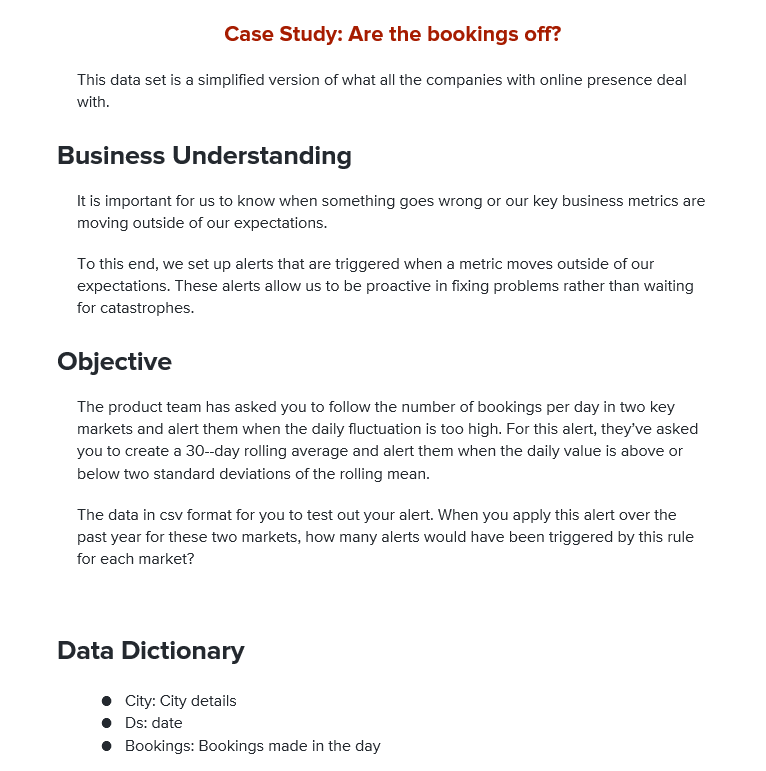

In [1]:
import pandas as pd 


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv") 

In [3]:
df 

,city,ds,bookings
0,City_2,01/01/2013,69
1,City_2,01/02/2013,101
2,City_2,01/03/2013,134
3,City_2,01/04/2013,155
4,City_2,01/05/2013,104
...,...,...,...
724,City_1,12/27/13,55
725,City_1,12/28/13,63
726,City_1,12/29/13,55
727,City_1,12/30/13,66


In [4]:
df

,city,ds,bookings
0,City_2,01/01/2013,69
1,City_2,01/02/2013,101
2,City_2,01/03/2013,134
3,City_2,01/04/2013,155
4,City_2,01/05/2013,104
...,...,...,...
724,City_1,12/27/13,55
725,City_1,12/28/13,63
726,City_1,12/29/13,55
727,City_1,12/30/13,66


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      729 non-null    object
 1   ds        729 non-null    object
 2   bookings  729 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.2+ KB


In [6]:
# the data set has an auto generated index so I will set nex indexes to be able to better sliced and dice the data later
# to that, I could have modifed the initial query in ln[18] and re-run it, but for demostration purposes I'll write a 
# new code below

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv").set_index(['city','ds'])

In [8]:
df

bookings
city   ds                  
City_2 01/01/2013        69
       01/02/2013       101
       01/03/2013       134
       01/04/2013       155
       01/05/2013       104
...                     ...
City_1 12/27/13          55
       12/28/13          63
       12/29/13          55
       12/30/13          66
       12/31/13          65

[729 rows x 1 columns]

In [9]:
# having new indexes, I can now create the rolling average calculation, without the need of creating 2 separate datasets.


In [10]:
df['R.Mean'] = (df.groupby(level='city')['bookings'].rolling(window=30).mean().droplevel(0).round(1))

In [11]:
df

bookings  R.Mean
city   ds                          
City_2 01/01/2013        69     NaN
       01/02/2013       101     NaN
       01/03/2013       134     NaN
       01/04/2013       155     NaN
       01/05/2013       104     NaN
...                     ...     ...
City_1 12/27/13          55    63.1
       12/28/13          63    63.2
       12/29/13          55    62.7
       12/30/13          66    63.5
       12/31/13          65    63.1

[729 rows x 2 columns]

In [12]:
# creating calculation for 30 days rolling standard deviaton

In [13]:
df['R.Std'] = (df.groupby(level='city')['bookings'].rolling(window=30).std().droplevel(0).round(1))

In [14]:
df

bookings  R.Mean  R.Std
city   ds                                 
City_2 01/01/2013        69     NaN    NaN
       01/02/2013       101     NaN    NaN
       01/03/2013       134     NaN    NaN
       01/04/2013       155     NaN    NaN
       01/05/2013       104     NaN    NaN
...                     ...     ...    ...
City_1 12/27/13          55    63.1   12.9
       12/28/13          63    63.2   12.9
       12/29/13          55    62.7   13.0
       12/30/13          66    63.5   12.4
       12/31/13          65    63.1   12.1

[729 rows x 3 columns]

In [15]:
# in the calculated fields there are null values since the first 30 days for each city where used for the calculation.
# Since these are not needed, will drop the null values.

In [16]:
df.dropna(inplace=True)

In [17]:
df.loc["City_1"].head(35)

,bookings,R.Mean,R.Std
ds,,,
1/30/13,26,21.8,4.8
1/31/13,20,21.9,4.7
02/01/2013,24,22.0,4.7
02/02/2013,17,22.1,4.6
02/03/2013,23,22.1,4.6
02/04/2013,19,22.2,4.5
02/05/2013,34,22.9,4.8
02/06/2013,38,23.1,5.4
02/07/2013,27,23.3,5.4


In [18]:
df.loc["City_2"].head(35)

,bookings,R.Mean,R.Std
ds,,,
1/30/13,144,136.2,26.6
1/31/13,160,139.2,23.7
02/01/2013,159,141.1,22.8
02/02/2013,115,140.5,23.3
02/03/2013,129,139.6,23.2
02/04/2013,128,140.4,22.3
02/05/2013,185,142.6,23.5
02/06/2013,171,143.5,24.0
02/07/2013,163,143.2,23.7


In [19]:
# create calculation for alert above

In [20]:
df["Trigger Above"] = (df["R.Mean"] + (2*df["R.Std"]))

In [21]:
# create calculation for alert below

In [22]:
df["Trigger below"] = (df["R.Mean"] - (2*df["R.Std"]))

In [23]:
df

bookings  R.Mean  R.Std  Trigger Above  Trigger below
city   ds                                                               
City_2 1/30/13          144   136.2   26.6          189.4           83.0
       1/31/13          160   139.2   23.7          186.6           91.8
       02/01/2013       159   141.1   22.8          186.7           95.5
       02/02/2013       115   140.5   23.3          187.1           93.9
       02/03/2013       129   139.6   23.2          186.0           93.2
...                     ...     ...    ...            ...            ...
City_1 12/27/13          55    63.1   12.9           88.9           37.3
       12/28/13          63    63.2   12.9           89.0           37.4
       12/29/13          55    62.7   13.0           88.7           36.7
       12/30/13          66    63.5   12.4           88.3           38.7
       12/31/13          65    63.1   12.1           87.3           38.9

[671 rows x 5 columns]

In [24]:
# create alert column using numpy

In [25]:
import numpy as np


In [26]:
df["Alert"] = np.where(
    df["bookings"] > df["Trigger Above"],True,np.where(
    df["bookings"] < df["Trigger below"],True,False))

In [27]:
df

bookings  R.Mean  R.Std  Trigger Above  Trigger below  \
city   ds                                                                  
City_2 1/30/13          144   136.2   26.6          189.4           83.0   
       1/31/13          160   139.2   23.7          186.6           91.8   
       02/01/2013       159   141.1   22.8          186.7           95.5   
       02/02/2013       115   140.5   23.3          187.1           93.9   
       02/03/2013       129   139.6   23.2          186.0           93.2   
...                     ...     ...    ...            ...            ...   
City_1 12/27/13          55    63.1   12.9           88.9           37.3   
       12/28/13          63    63.2   12.9           89.0           37.4   
       12/29/13          55    62.7   13.0           88.7           36.7   
       12/30/13          66    63.5   12.4           88.3           38.7   
       12/31/13          65    63.1   12.1           87.3           38.9   

                   Alert  
city   ds                 
City_2 1/30/13     False  
       1/31/13     False  
       02/01/2013  False  
       02/02/2013  False  
       02/03/2013  False  
...                  ...  
City_1 12/27/13    False  
       12/28/13    False  
       12/29/13    False  
       12/30/13    False  
       12/31/13    False  

[671 rows x 6 columns]

In [28]:
# checking number of alets triggered for both above and below for city 2

In [29]:
df.loc[["City_2"],["Alert"]].value_counts()

Alert
False    327
True       8
dtype: int64

In [30]:
# plotting city 2 results

<AxesSubplot:title={'center':'City_2 Bookings'}, xlabel='city,ds'>

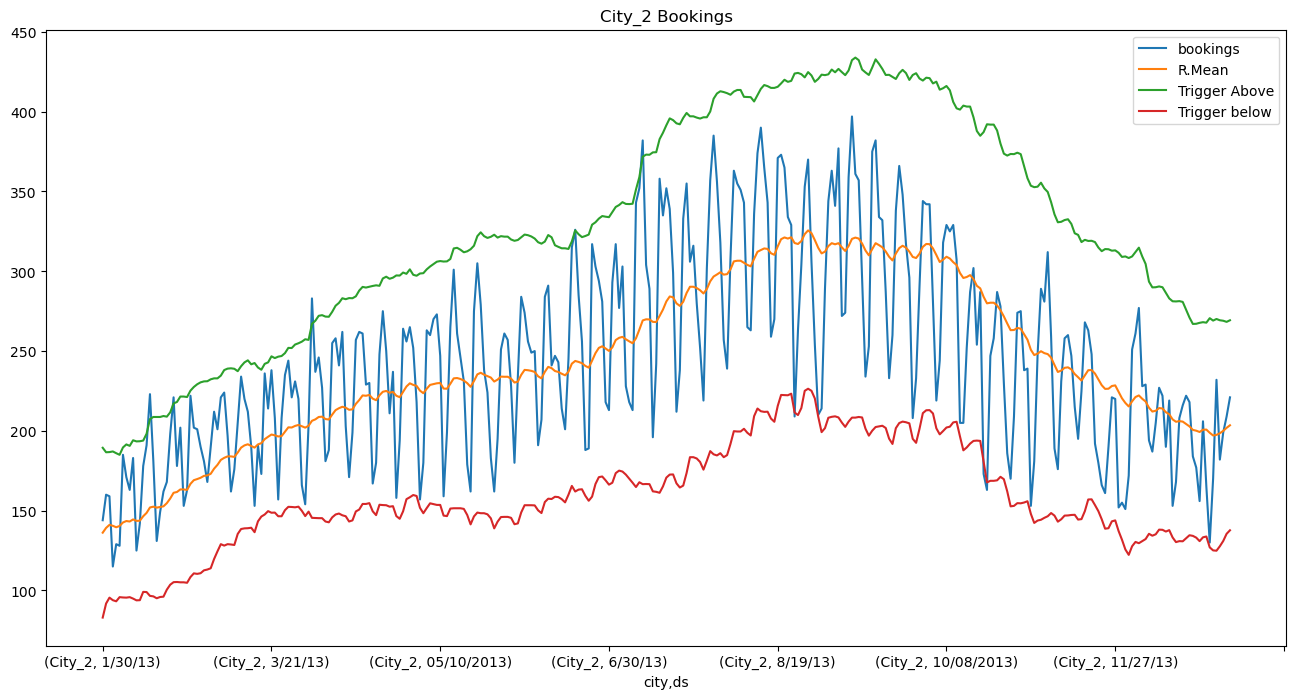

In [31]:
df.loc[["City_2"],["bookings","R.Mean","Trigger Above","Trigger below"]].plot(title='City_2 Bookings',figsize=(16, 8))


In [32]:
# checking number of alets triggered for both above and below for city 1

In [33]:
df.loc[["City_1"],["Alert"]].value_counts()

Alert
False    318
True      18
dtype: int64

In [34]:
# plotting city 1 results

<AxesSubplot:title={'center':'City_1 Bookings'}, xlabel='city,ds'>

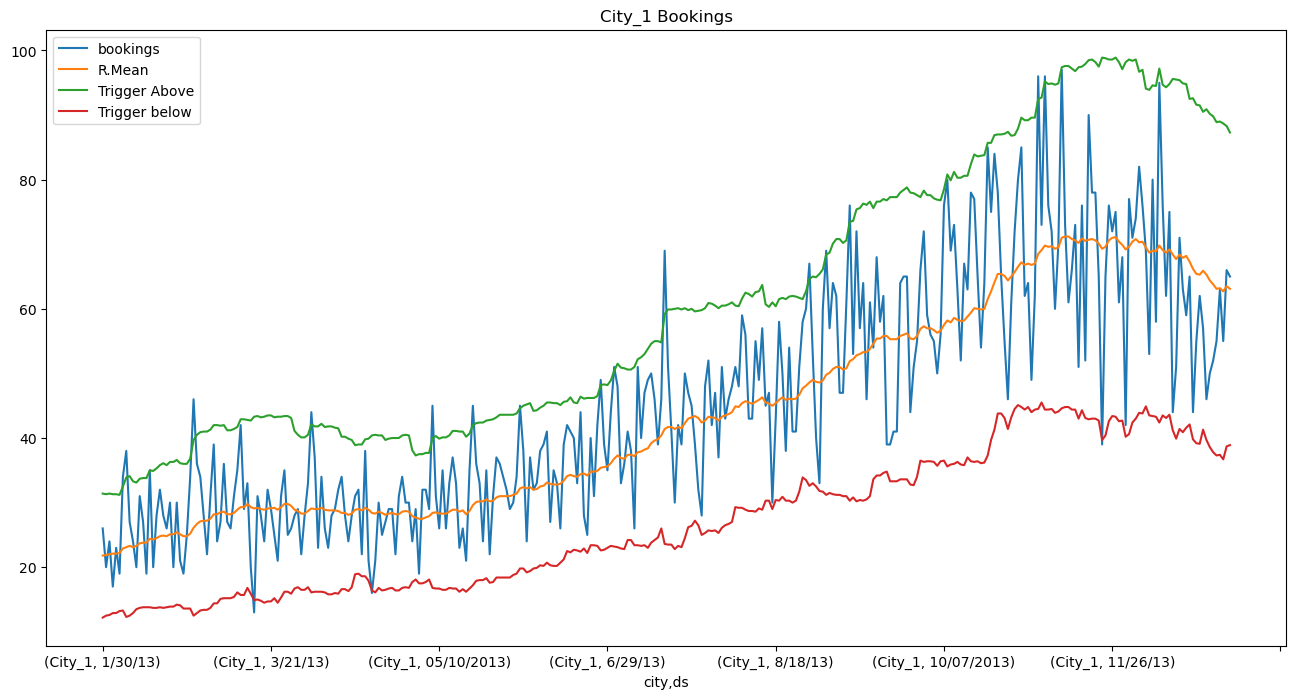

In [35]:
df.loc[["City_1"],["bookings","R.Mean","Trigger Above","Trigger below"]].plot(title='City_1 Bookings',figsize=(16, 8))
